In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from numba import cuda
from timeit import default_timer as timer

## Cargar la foto y cambiar de tamaño la foto

Dimension de la foto:  (198, 300)


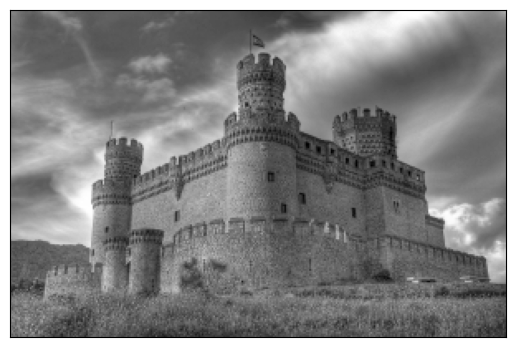

Dimension de la foto:  (396, 600)


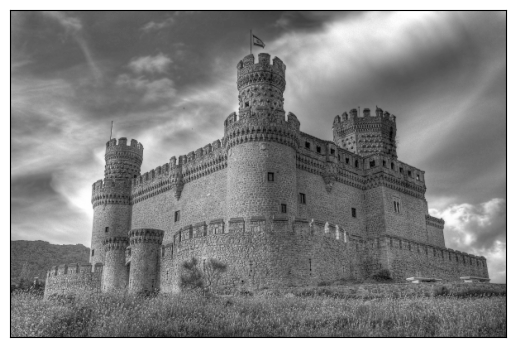

Dimension de la foto:  (792, 1200)


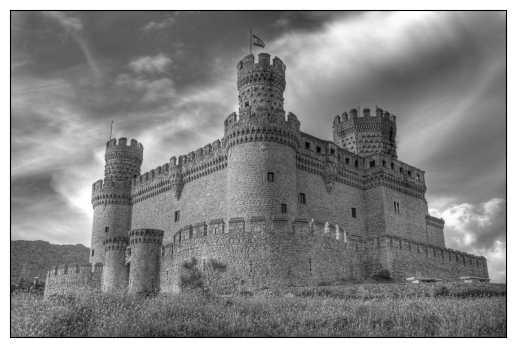

Dimension de la foto:  (1584, 2400)


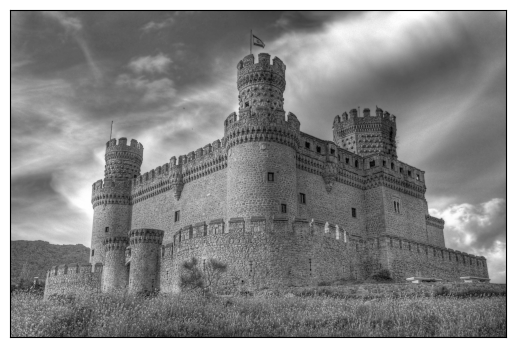

Dimension de la foto:  (3168, 4800)


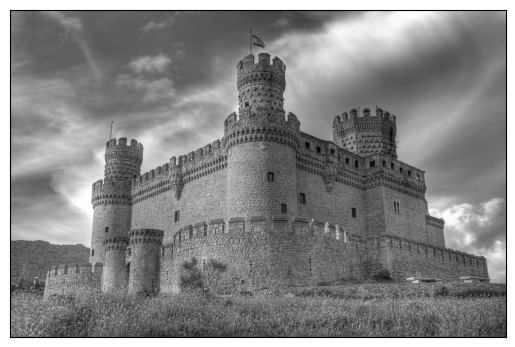

In [7]:
foto = cv.imread("castillo.jpg", cv.IMREAD_GRAYSCALE)

fotos = []
ancho = foto.shape[1]
alto = foto.shape[0]
alto = int(alto/10)
ancho = int(ancho/10)
# Obtener el nuevo tamaño de la foto
for i in range(5):
    # Saca la foto 
    foto_res = cv.resize(foto, (ancho, alto), interpolation = cv.INTER_AREA)
    # Guarda la foto
    fotos.append(foto_res)
    ancho = ancho*2
    alto = alto*2
    
# Mostrar las fotos 
for i in range(5):
        # Dimension de la foto
        plt.figure()
        print("Dimension de la foto: ", fotos[i].shape) #Muesta la foto
        plt.imshow(fotos[i],cmap='gray') # Filtro de la foto
        plt.xticks([])
        plt.yticks([])
        plt.show()

In [8]:
filtro = np.array ([[-1,0,1],[-2,0,2],[-1,0,1]]) # Filtro de tipo Sobel
print(filtro) 



[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [9]:

def convolucion(foto_completa, filter_array):
    # Se hace una matriz de ceros del tamaño de la foto original
    foto = np.zeros_like(foto_completa)
    foto = foto_completa
    alto = foto.shape[0]
    ancho = foto.shape[1]
      # Obtener el tamaño del filter_array
    alto_kernel = filter_array.shape[0]    
    # Tamaño del padding
    padding = int(alto_kernel/2)
    # Rellenar los bordes de la foto con 0 y guardarla en una variable sin usar cv2
    foto2 = np.pad(foto, padding, mode='constant', constant_values=0)
    # Crear una foto vacia para guardar la foto filtrada
    foto_filtrada = np.zeros((alto, ancho))
    # Recorrer la foto
    for x in range(padding, alto+padding):
        for y in range(padding, ancho+padding):
            # Obtener la region de la foto que se va a filtrar
            region = foto2[x-padding:x+padding+1, y-padding:y+padding+1]
            # Multiplicar la region por el filter_array
            producto = region * filter_array
            # Obtener el valor del filtro
            valor_filtro = np.sum(producto)
            if(valor_filtro > 255):
                valor_filtro = 255
            if(valor_filtro < 0):
                valor_filtro = 0
            foto_filtrada[x-padding, y-padding] = valor_filtro
    foto = foto_filtrada
    return foto 

Para la foto de tamaño  (198, 300) Tiempo de ejecucion:  0.5250129997730255
Para la foto de tamaño  (396, 600) Tiempo de ejecucion:  2.655117900110781
Para la foto de tamaño  (792, 1200) Tiempo de ejecucion:  9.702697500120848
Para la foto de tamaño  (1584, 2400) Tiempo de ejecucion:  35.68789549963549
foto original
Tamaño de la foto:  (3168, 4800)


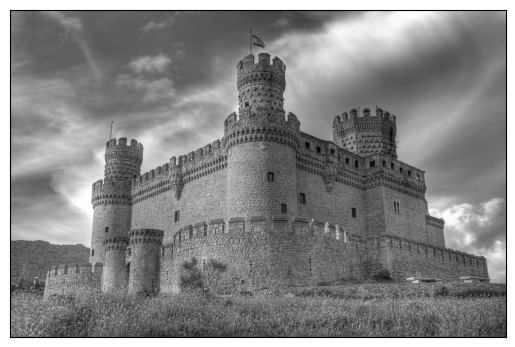

Para la foto de tamaño  (3168, 4800) Tiempo de ejecucion:  130.91243210015818
foto filtrada


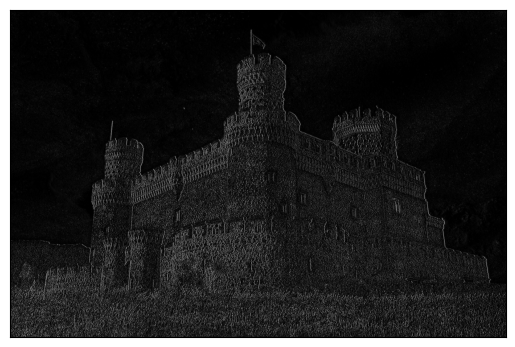

Tiempo total:  179.48315599979833


In [10]:
tiempo = []
for i in range (5):
    # Sacar la foto
    if(i==4):
        plt.figure()
        print("foto original")
        print("Tamaño de la foto: ", fotos[i].shape)
        plt.imshow(fotos[i],cmap='gray') 
        plt.xticks([])
        plt.yticks([])
        plt.show()
    s = timer()
    foto_filtrada = convolucion(fotos[i],filtro)    
    e = timer()
    tiempo.append(e-s)
    print("Para la foto de tamaño ", fotos[i].shape , "Tiempo de ejecucion: ", tiempo[i])
    # foto despues de pasar el filtro
    if(i==4):
        print("foto filtrada")
        plt.figure()
        plt.imshow(foto_filtrada,cmap='gray')
        plt.xticks([])
        plt.yticks([])
        plt.show()
print("Tiempo total: ", np.sum(tiempo))

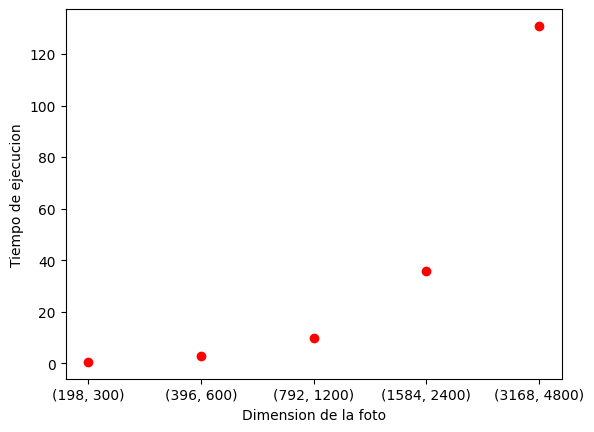

In [11]:
# Realiza un grafico que compare el tiempo que tarda cada foto y la forma de la foto
plt.figure()
plt.plot(tiempo, 'ro')
plt.xticks([0,1,2,3,4], [fotos[0].shape, fotos[1].shape, fotos[2].shape, fotos[3].shape, fotos[4].shape])
plt.xlabel('Dimension de la foto')
plt.ylabel('Tiempo de ejecucion')
plt.show()